In [22]:
# keras의 fit()메서드는 History 클래스 객체를 반환 -> 훈련과정에서 계산한 지표, 즉 손실과 정확도 값 저장 -> 그래프를 그릴 수 있다

# 데이터 준비
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [23]:
# 층 추가 함수 구현
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

# 함수 확인
model = model_fn()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# 모델 훈련, fit()메서드 결과 history 변수에 저장
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) # verbose 매개변수는 훈련 과정 출력 조절, 기본값 1

print(history.history.keys())

dict_keys(['loss', 'accuracy'])


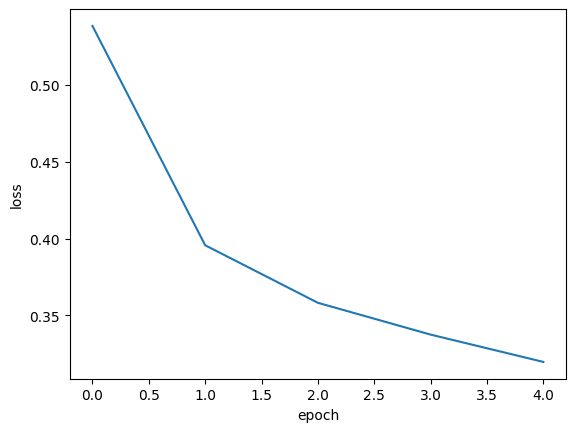

In [25]:
# loss 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

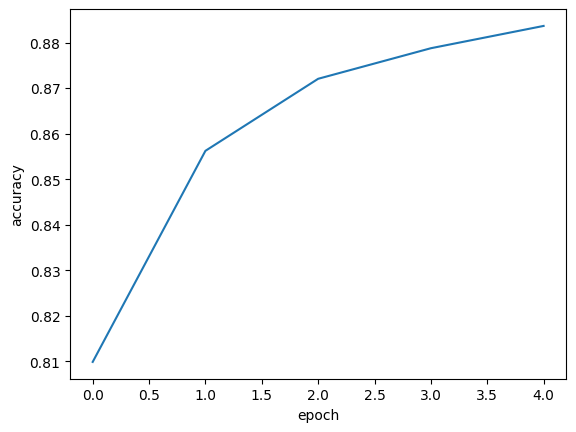

In [26]:
# accuracy 그래프 그리기
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

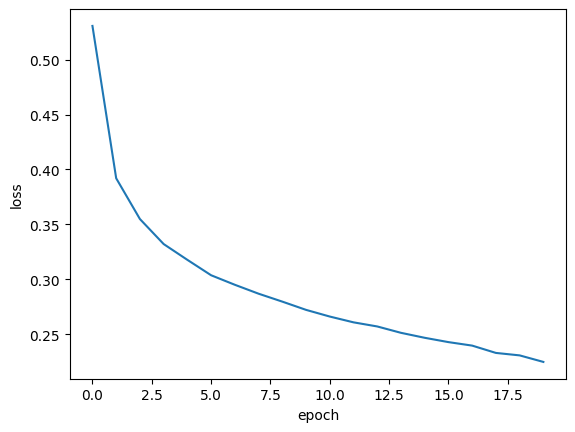

In [27]:
# 에포크마다 손실이 감소, 정확도 향상 -> 추가학습
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [28]:
# 인공신경망 모델이 최적화하는 대상은 손실함수, 손실감소에 비례하여 정확도가 항상 높아지는것은 X -> 손실감소 함수 값을 확인

# 에포크마다 검증 손실을 계산하기위해 fit()메서드에 검증데이터를 전달(validation_data 매개변수)
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled,val_target))

In [29]:
# print(history.history.keys())

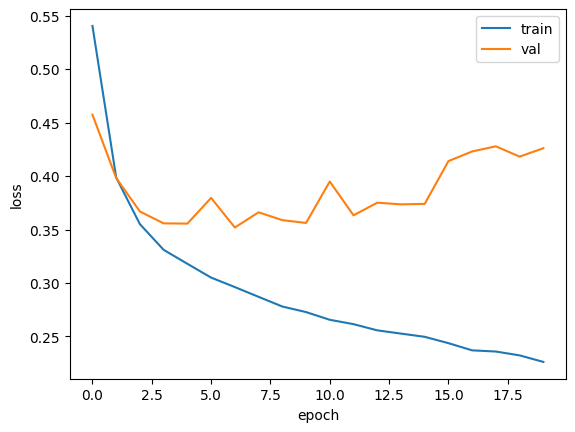

In [30]:
# 훈련손실과 검증손실 그래프 나타내기
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
# 전형적인 과대적합 모델

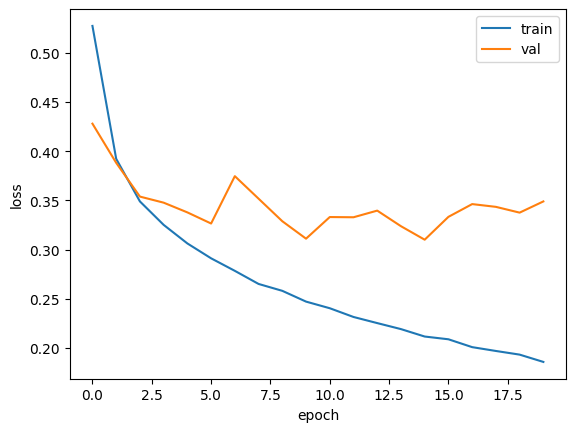

In [31]:
# 옵티마이저 하이퍼파라미터 조정을 통해 과대 적합을 완화할 수 있는지 확인
# Adam 옵티마이저 적용
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
# Adam 옵티마이저가 데이터셋에 잘맞는다는 것을 확인할 수 있음, 학습률을 조정하여 다시 시도할 필요가 있음

In [32]:
# 드롭아웃 -> 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있다 -> 더 안정적인 예측
#        -> 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블 하는 것 -> 과대적합 방지
model = model_fn(keras.layers.Dropout(0.3)) # 30%를 드롭아웃하는 드롭아웃 층 추가
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 100)               78500     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


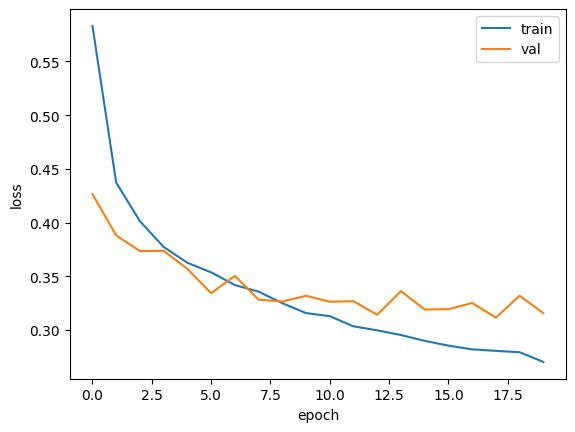

In [33]:
# 훈련손실과 검증손실의 그래프를 그려 비교
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [34]:
# 드롭아웃 층을 만들어서 과대적합이 줄은 것을 확인할 수 있다, but 20epoch 동안 훈련을 했기 때문에 아직 다소 과대적합.

In [35]:
# epoch 횟수를 11로 지정
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=11, verbose=0, validation_data=(val_scaled,val_target))

In [36]:
# 모델 저장
model.save('model-whole.keras')

# 모델의 파라미터만 저장 -> 파일 확장자명 weight.h5
model.save_weights('model.weight.h5')

# 확인
!ls -al model*

-rw-rw-r-- 1 parkwooyeol parkwooyeol 333320  8월 25 14:17 model.weight.h5
-rw-rw-r-- 1 parkwooyeol parkwooyeol 979708  8월 25 14:17 model-whole.keras


In [37]:
# 1. 훈련을 하지 않은 새로운 모델을 만들고 model-weight.h5파일에서 모델 파라미터를 읽어서 사용
# 2. model-whole.keras 파일에서 새로운 모델을 만들어 바로 사용
# 1번과 2번 비교

In [38]:
# 1번
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weight.h5')

# predict() 매서드는 10개의 클래스에 대한 확률을 반환((12000,10)크기), 10개 확률 중에 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도 계산
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1) # 마지막 차원을 기준으로, 확률 벡터에서 제일 큰 확률을 가진 클래스 번호를 가져옴
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 843us/step
0.8775


In [39]:
# 2번
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target) # complie() 메서드를 실행해야 evaluate() 메서드 사용가능
# 같은 모델을 저장하고 다시 불러들였기 때문에 동일한 정확도

375/375 [==============================] - 0s 1ms/step - loss: 0.3390 - accuracy: 0.8775


[0.339027464389801, 0.8774999976158142]

In [40]:
# 같은 모델을 저장하고 다시 불러들였기 때문에 동일한 정확도# 모델을 과대적합하지 않게 만들기위해 특정 에포크만큼 다시 훈련을 진행함 -> 케라스의 콜백 사용

# 콜백 -> 에포크마다 모델을 저장 -> 가장 낮은 검증 손실을 만드는 모델을 저장할 수 있음
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.tf', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])

INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


In [41]:
model = keras.models.load_model('best-model.tf')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 951us/step - loss: 0.3171 - accuracy: 0.8904


[0.3170523941516876, 0.89041668176651]

In [42]:
# 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 조기종료라고 부른다
# EarlyStopping -> patience 매개변수는 점수가 향상되지않더라도 참을 에포크 횟수 지정
#               -> restore_best_weights 매개변수를 True로 지정하면 가장 낮으 검증 손을을 낸 모델 파라미터로 되돌린다

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.tf', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb, early_stopping_cb])

INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


INFO:tensorflow:Assets written to: best-model.tf/assets


In [ ]:
# 몇번쨰 에포크에서 훈련이 중지됐는지 확인
print(early_stopping_cb.stopped_epoch)
# patience를 2로 지정했기 때문에 최상의 모델은 9번째 에포크

10


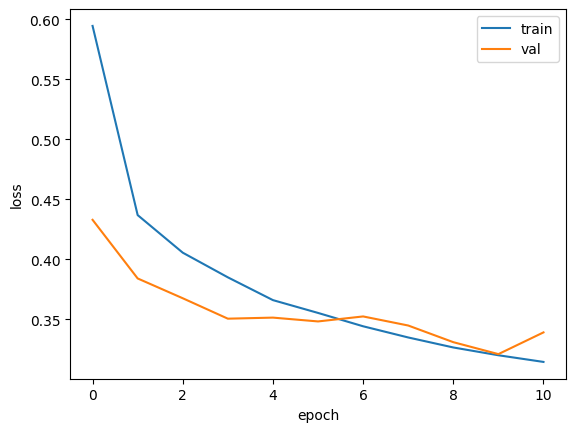

In [44]:
# 훈련손실과 검증손실 확인
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [45]:
# 검증세트에 대한 성능확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 915us/step - loss: 0.3268 - accuracy: 0.8813


[0.3267703354358673, 0.8813333511352539]